### Sleep Disorder Prediction

The primary goal of this project is to evaluate an individual's lifestyle and medical parameters, such as age, BMI, physical activity, sleep duration, blood pressure, and various other factors. The aim is to make predictions regarding the presence of sleep disorders and their specific types.

### Dataset Overview

The Sleep Health and Lifestyle Dataset consists of 400 rows and 13 columns, encompassing a broad spectrum of variables associated with sleep habits and daily routines. This dataset includes information on gender, age, occupation, sleep duration, sleep quality, level of physical activity, stress levels, BMI categories, blood pressure values, heart rate, daily step counts, and whether sleep disorders are present or not.


### Data Dictionary


| Column Name | Description |
| --- | --- |
|Person_ID | Unique ID assigned to each person |
|Gender|The gender of the person (Male/Female)|
|Age | Age of the person in years |
|Occupation | The occupation of the person |
|Sleep_duration | The duration of sleep of the person in hours |
|Quality_of_sleep | A subjective rating of the quality of sleep, ranging from 1 to 10|
|Physical_activity | The level of physical activity of the person (Low/Medium/High) |
|Stress Level| A subjective rating of the stress level, ranging from 1 to 10 |
|BMI_category | The BMI category of the person (Underweight/Normal/Overweight/Obesity) |
|Blood_pressure | The blood pressure of the person in mmHg |
|Heart_rate | The heart rate of the person in beats per minute |
|Daily Steps | The number of steps taken by the person per day |
|Sleep_disorder | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea) |



### Key Dataset Features

Comprehensive Sleep Metrics: Examination of sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analysis of physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Assessment of blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identification of sleep disorders, such as Insomnia and Sleep Apnea.

### Information Regarding the Sleep Disorder Column

Within this dataset, the "Sleep Disorder" column provides valuable insights into individuals' sleep-related conditions. It encompasses three main categories:

- None: Signifying the absence of any discernible sleep disorder, individuals in this category exhibit normal sleep patterns without significant disruptions.

- Insomnia: This category includes individuals who face difficulties falling asleep or staying asleep, potentially resulting in inadequate or poor-quality sleep and affecting their overall well-being.

- Sleep Apnea: Individuals categorized here experience interruptions in their breathing during sleep, leading to disrupted sleep patterns and potential health risks if left untreated.

This categorization facilitates a comprehensive analysis of various sleep-related conditions within the dataset, contributing to a more holistic understanding of sleep health.


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

### Data Preprcessing

In this step, all types of data in the dataset were evaluated, and unnecessary columns were subsequently removed. Morerover, removing the existed nulls in the columns with the approperiate way(s). Furthermore, it involves appropriately removing existing null values within the columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
df.drop('Person ID', axis=1, inplace=True)

### Categorical columns information
By executing this code, comprehensive information regarding columns with categorical data will be displayed.

In [6]:
categorical_columns = df.select_dtypes(include=['object'])

# Iterate through each categorical column and print the value counts
for column in categorical_columns:
    print(f'Column: {column}')
    print(df[column].value_counts())
    print('\n')

Column: Gender
Male      189
Female    185
Name: Gender, dtype: int64


Column: Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64


Column: BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64


Column: Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: int64


Column: Sleep Disorder
Sleep Apnea    78
Insomnia     

Based on the provided information, it appears that there are 219 null values present in the "Sleep Disorder" column. Additionally, subsequent steps involved making changes to the "BMI" and "Blood Pressure" columns.

In [7]:
df['Sleep Disorder'].fillna('None', inplace=True)

In [8]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Iterate through each numeric column and print the value counts
for column in numeric_columns:
    print(f'Column: {column}')
    print(df[column].value_counts())
    print('\n')

Column: Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: Age, dtype: int64


Column: Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
7.3    14
8.4    14
6.3    13
8.5    13
8.0    13
6.2    12
8.2    11
7.6    10
6.4     9
7.9     7
7.4     5
6.7     5
7.5     5
6.8     5
8.3     5
5.9     4
6.9     3
5.8     2
Name: Sleep Duration, dtype: int64


Column: Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64


Column: Physical Activity Level
60    70
30    68
45    68
75    67
90    67
40     6
55     6
35     4
50     4
70     3
42     2
32     2
80     2
65     2
85     2
47     1
Name: Physical Activity Level, dtype: int64


Column: Stres

In [10]:
df.shape

(374, 12)

## Explorative Data Analysis  (EDA)

### Visualization

### a)

 In this scenario, we used a "for loop" to systematically inspect all the columns in our dataset. This method allowed us to thoroughly examine the different types of columns, including those containing text-based (categorical) information and numerical data.

By employing the "for loop" in this manner, we ensured a comprehensive assessment of our dataset. This approach helps us gain a complete picture of the dataset's content and structure, making it easier to understand the data for those with intermediate-level knowledge.

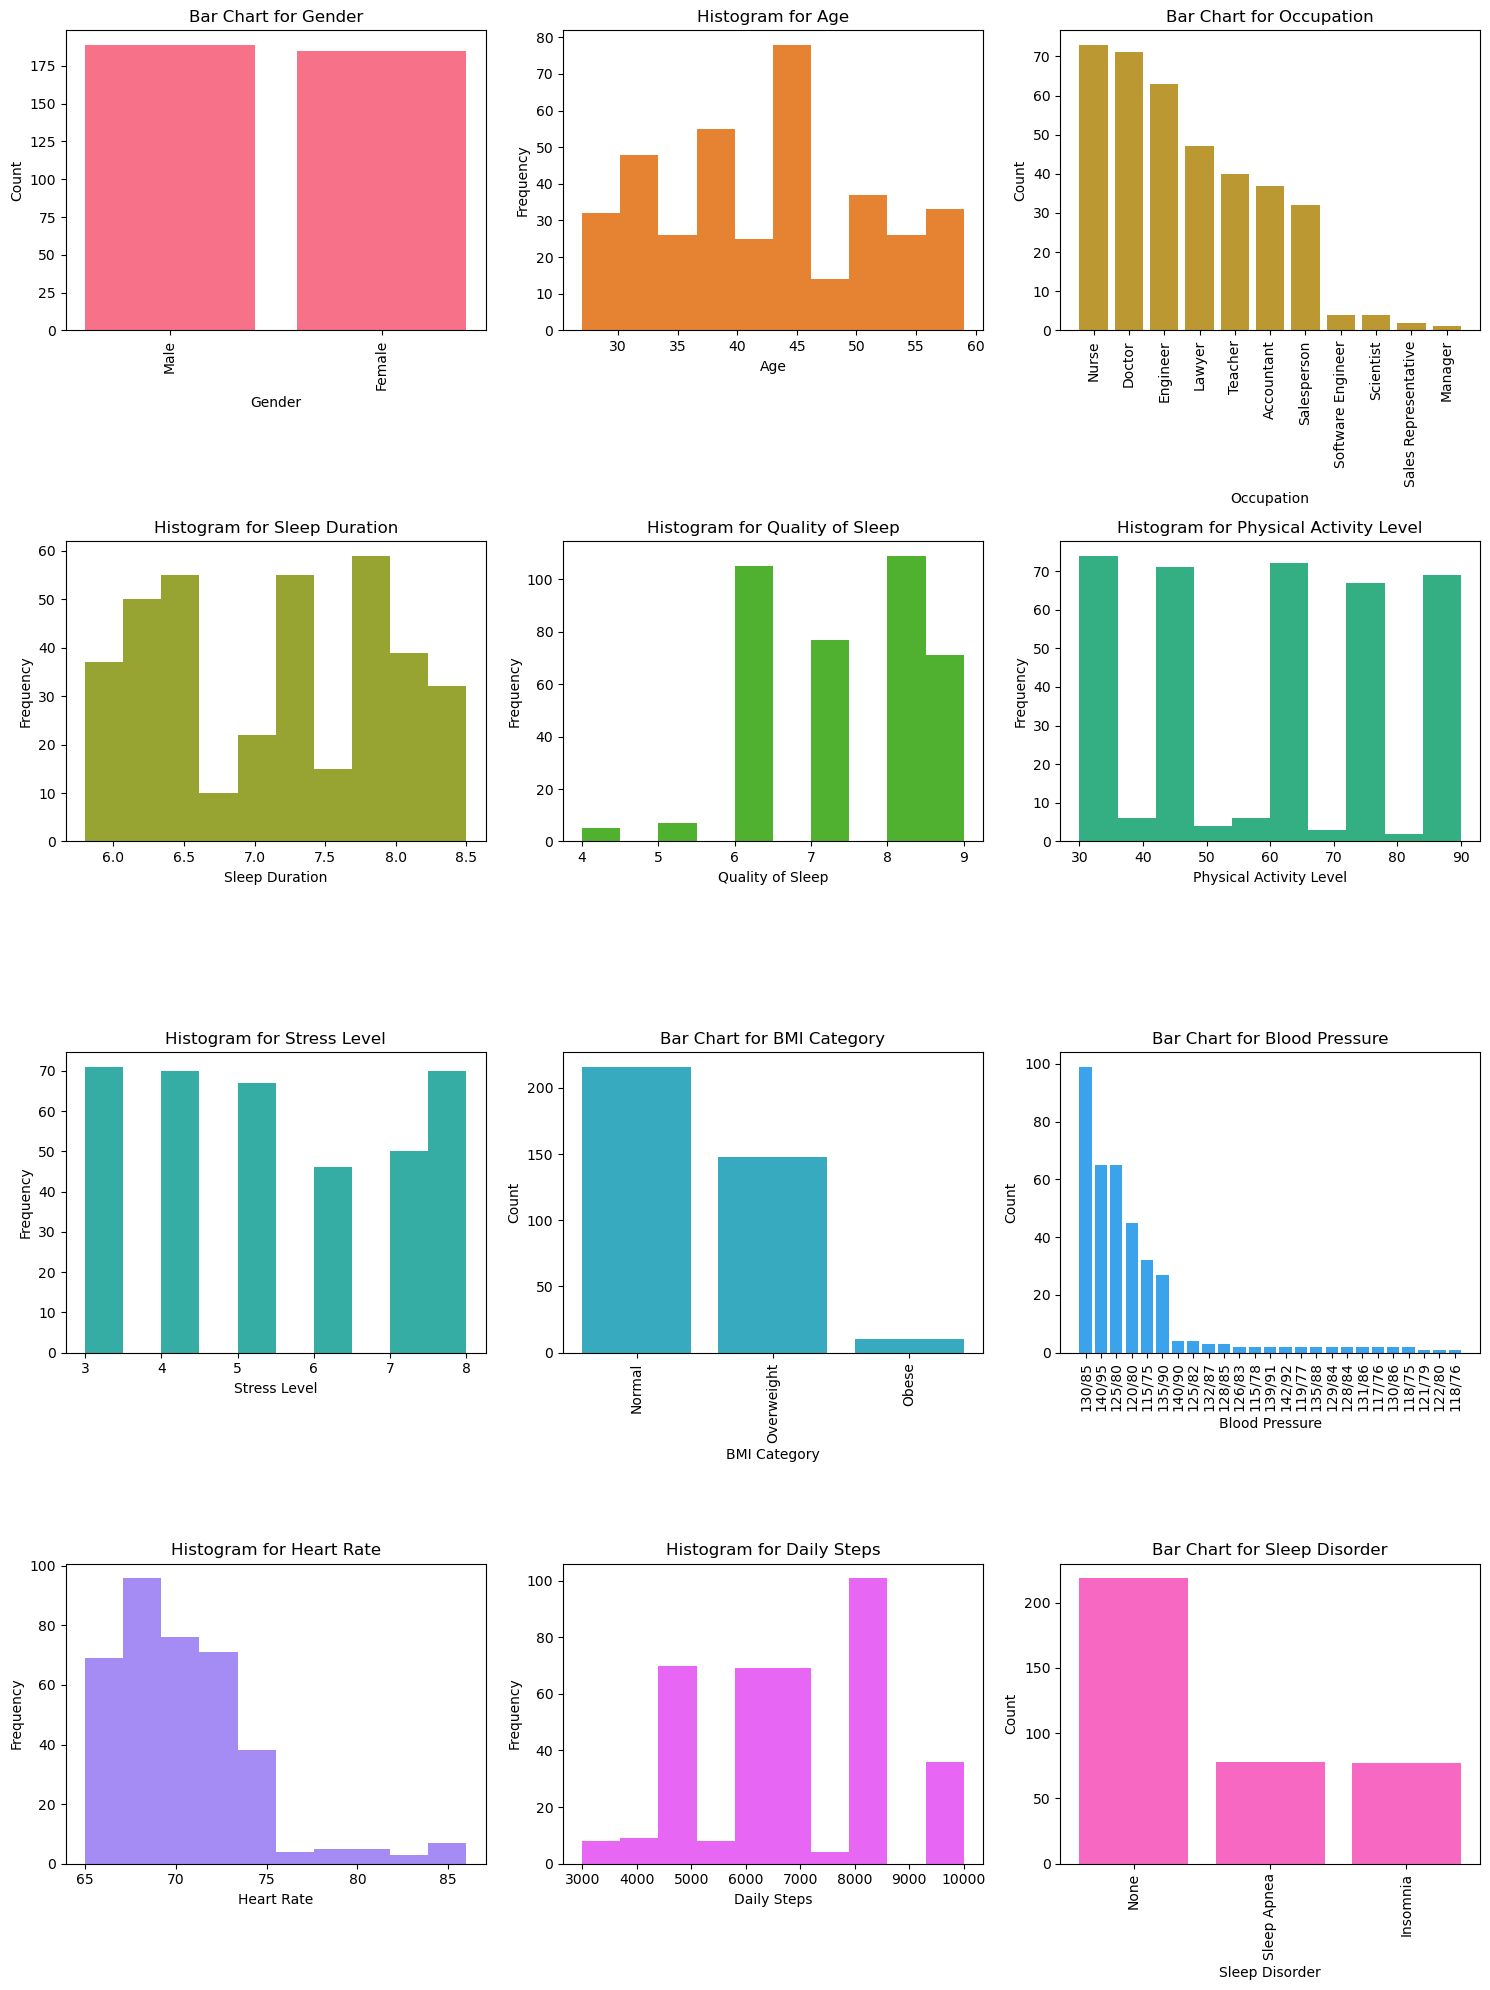

In [11]:

# Determine the number of plots per row
plots_per_row = 3
num_plots = len(df.columns)
num_rows = (num_plots - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define a mixed color palette
colors = sns.color_palette('husl', n_colors=num_plots)

for i, (column, color) in enumerate(zip(df.columns, colors)):
    ax = axes[i]

    if df[column].dtype == 'object':
        # For object columns, create a bar chart of value counts
        value_counts = df[column].value_counts()
        ax.bar(value_counts.index, value_counts.values, color=color)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Bar Chart for {column}')
        ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability
    else:
        # For numeric columns, create a histogram
        ax.hist(df[column], bins=10, color=color)  # Adjust the number of bins as needed
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histogram for {column}')

# Remove any empty subplots
for i in range(num_plots, num_rows * plots_per_row):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


Based on given information, the largest age group was distributed between the ages of 30 to 45.

## Visualization



 Here, the objective is to classify data into different categories, and we are treating the "class" as our target or reference point. To achieve this, we've employed loop programming to systematically compare all the columns in our dataset with this "class" column.

Specifically, we've utilized a "for loop" to generate diagrams that distinguish between categorical (object) and numerical (float64 and int64) columns in our dataset. This approach aids in visualizing and understanding the relationship between these columns and the target "class" variable, making it more accessible for analysis and interpretation.

*This method offers the advantage of effectively analyzing outliers.

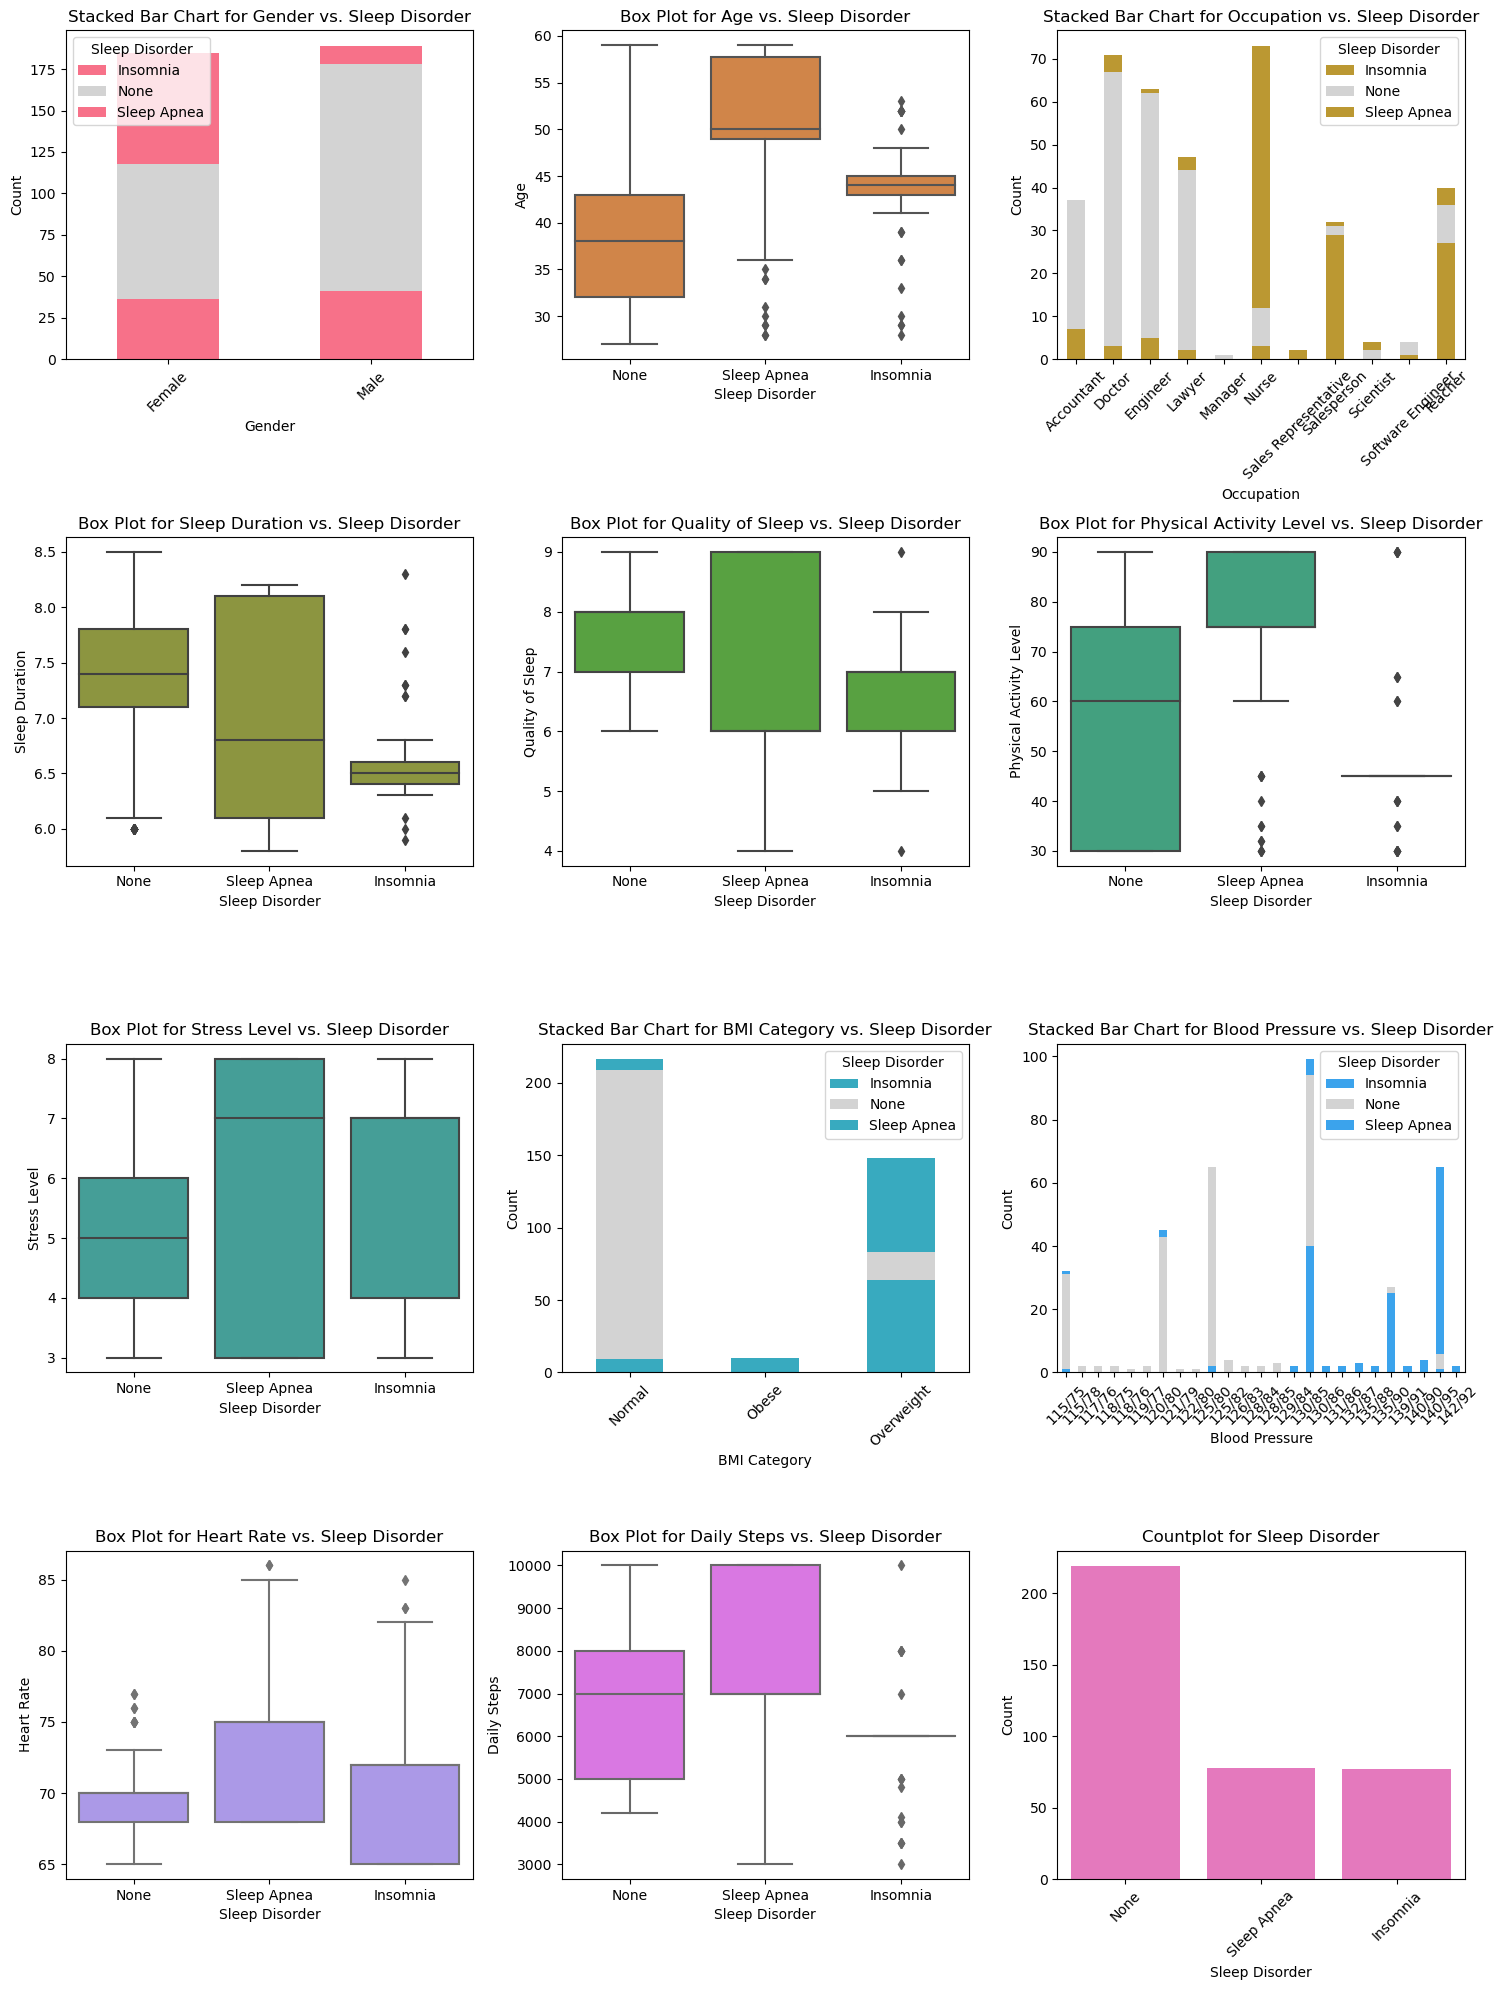

In [12]:
# Determine the number of plots per row
plots_per_row = 3
num_plots = len(df.columns)
num_rows = (num_plots - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define a mixed color palette
colors = sns.color_palette('husl', n_colors=num_plots)

# Select a reference column for comparison (e.g., "Sleep Disorder")
reference_column = "Sleep Disorder"

for i, (column, color) in enumerate(zip(df.columns, colors)):
    ax = axes[i]

    if df[column].dtype == 'object':
        if column == reference_column:
            # For the reference column, create a simple countplot
            sns.countplot(data=df, x=column, ax=ax, palette=[color])
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.set_title(f'Countplot for {column}')
            ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        else:
            # For other object columns, create a stacked bar chart with respect to the reference column
            cross_tab = pd.crosstab(df[column], df[reference_column])
            cross_tab.plot(kind='bar', stacked=True, color=[color, 'lightgray'], ax=ax)
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.set_title(f'Stacked Bar Chart for {column} vs. {reference_column}')
            ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    else:
        if column != reference_column:
            # For numeric columns, create box plots with respect to the reference column
            sns.boxplot(data=df, x=reference_column, y=column, ax=ax, palette=[color])
            ax.set_xlabel(reference_column)
            ax.set_ylabel(column)
            ax.set_title(f'Box Plot for {column} vs. {reference_column}')

# Remove any empty subplots
for i in range(num_plots, num_rows * plots_per_row):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### Dividing the blood pressure into systolic and diastolic columns


In [13]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

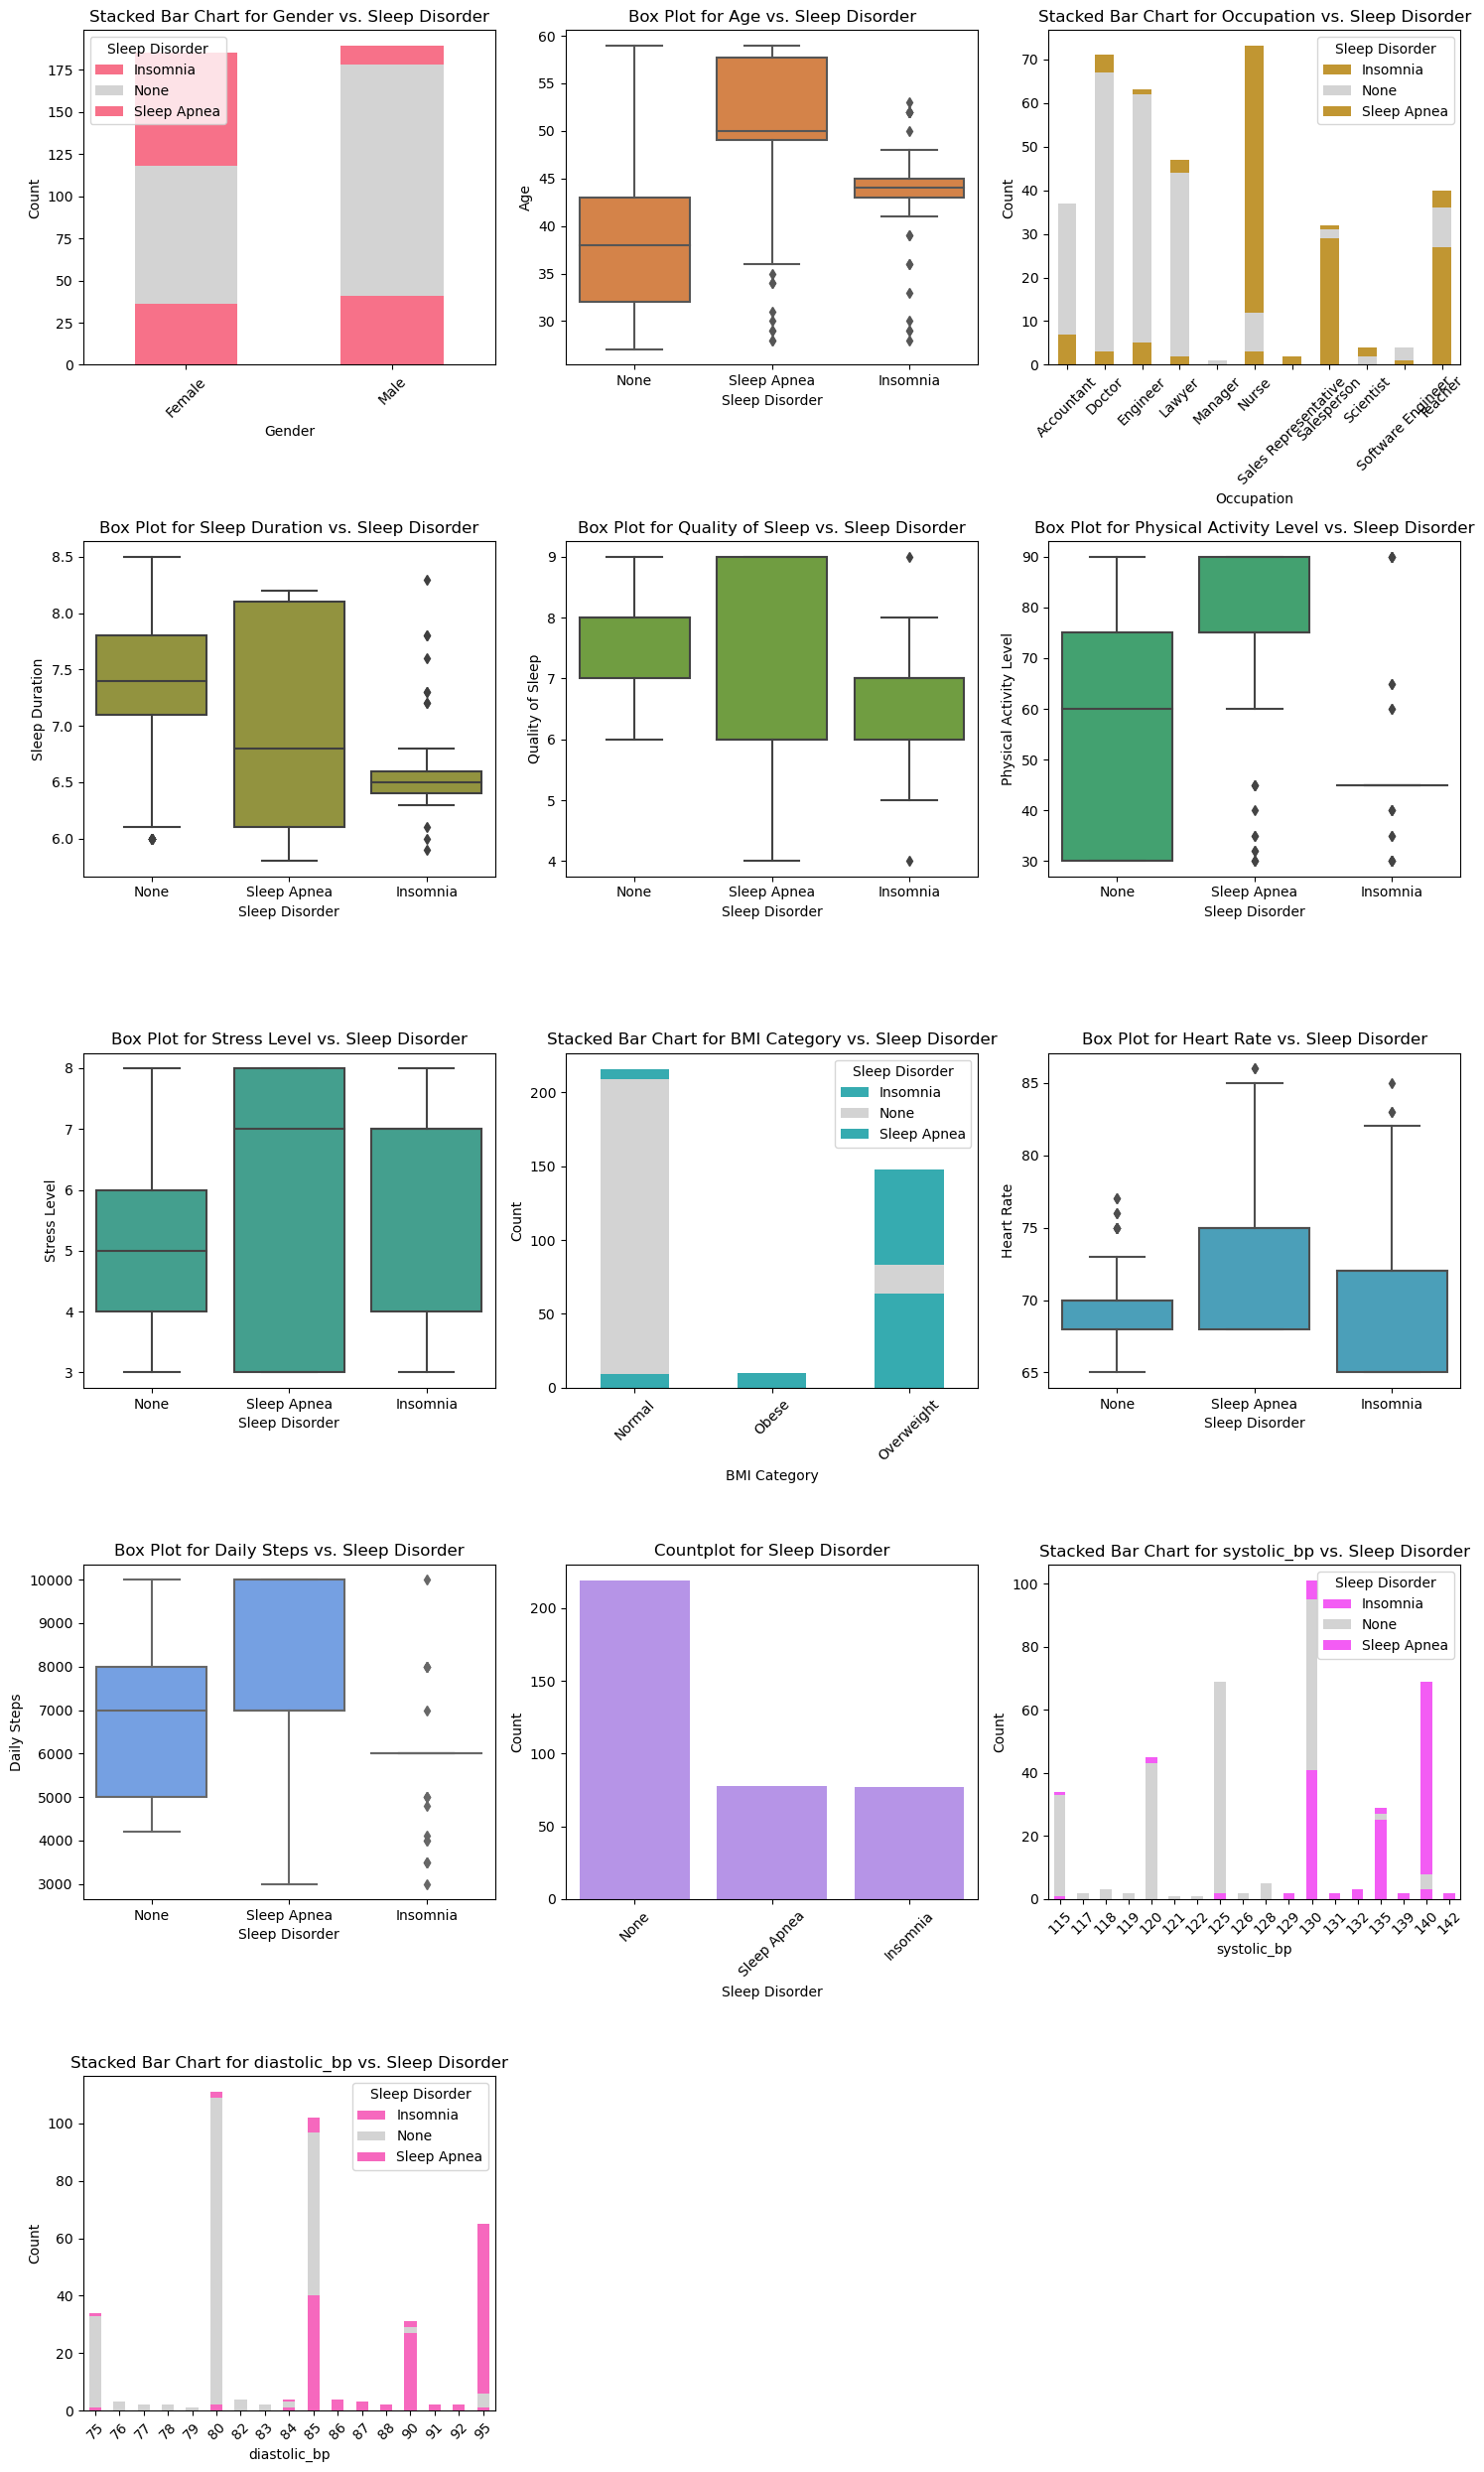

In [14]:
# Determine the number of plots per row
plots_per_row = 3
num_plots = len(df.columns)
num_rows = (num_plots - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define a mixed color palette
colors = sns.color_palette('husl', n_colors=num_plots)

# Select a reference column for comparison (e.g., "Sleep Disorder")
reference_column = "Sleep Disorder"

for i, (column, color) in enumerate(zip(df.columns, colors)):
    ax = axes[i]

    if df[column].dtype == 'object':
        if column == reference_column:
            # For the reference column, create a simple countplot
            sns.countplot(data=df, x=column, ax=ax, palette=[color])
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.set_title(f'Countplot for {column}')
            ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        else:
            # For other object columns, create a stacked bar chart with respect to the reference column
            cross_tab = pd.crosstab(df[column], df[reference_column])
            cross_tab.plot(kind='bar', stacked=True, color=[color, 'lightgray'], ax=ax)
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.set_title(f'Stacked Bar Chart for {column} vs. {reference_column}')
            ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    else:
        if column != reference_column:
            # For numeric columns, create box plots with respect to the reference column
            sns.boxplot(data=df, x=reference_column, y=column, ax=ax, palette=[color])
            ax.set_xlabel(reference_column)
            ax.set_ylabel(column)
            ax.set_title(f'Box Plot for {column} vs. {reference_column}')

# Remove any empty subplots
for i in range(num_plots, num_rows * plots_per_row):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

Based on the provided diagram, several key observations can be made:

- The gender distribution in the population appears to be balanced, with an approximately equal number of males and females.
- A majority of individuals in the dataset have a normal Body Mass Index (BMI).
- Outliers are present in the dataset, indicating potential extreme values or data points that differ significantly from the norm.
- There is a clear relationship between stress levels and sleep disorders, suggesting that higher stress levels are associated with a higher likelihood of sleep disorders.
- A significant portion of the population experiences both stress and sleep disorders concurrently.
- Males exhibit a lower prevalence of sleep disorders compared to females.
- Among all occupations, nurses appear to have the highest incidence of sleep disorders.

These observations provide valuable insights into the dataset's characteristics and highlight important relationships between various factors, such as gender, BMI, stress, and sleep disorders.

### Assessment of Occupation-Related Sleep Disorders

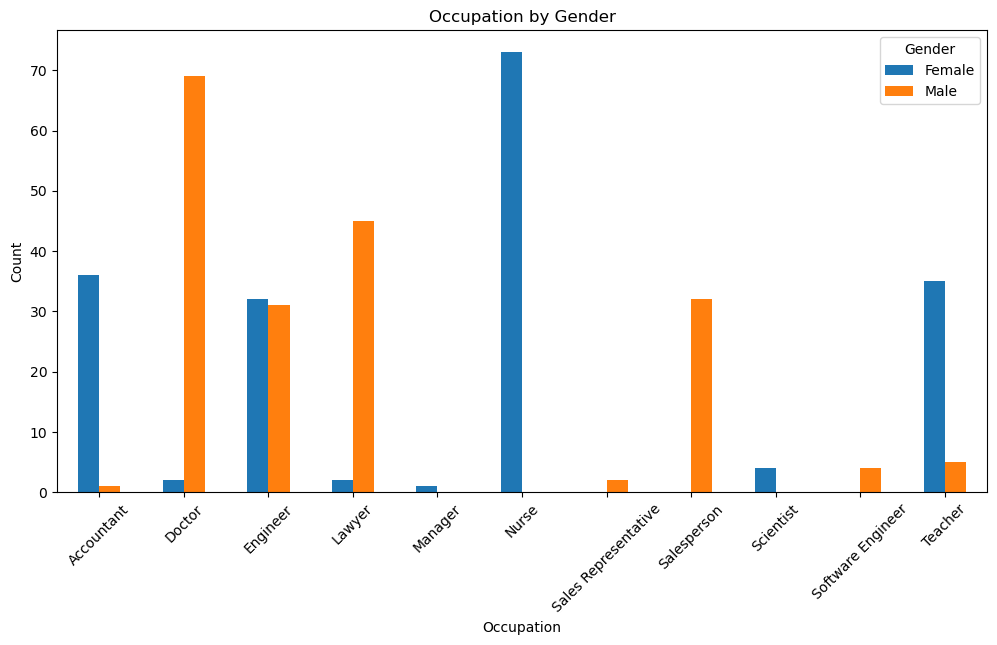

In [15]:
grouped = df.groupby(['Occupation', 'Gender']).size().unstack(fill_value=0)

# Plot a bar chart
ax = grouped.plot(kind='bar', figsize=(12, 6))

# Customize the plot
plt.title('Occupation by Gender')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

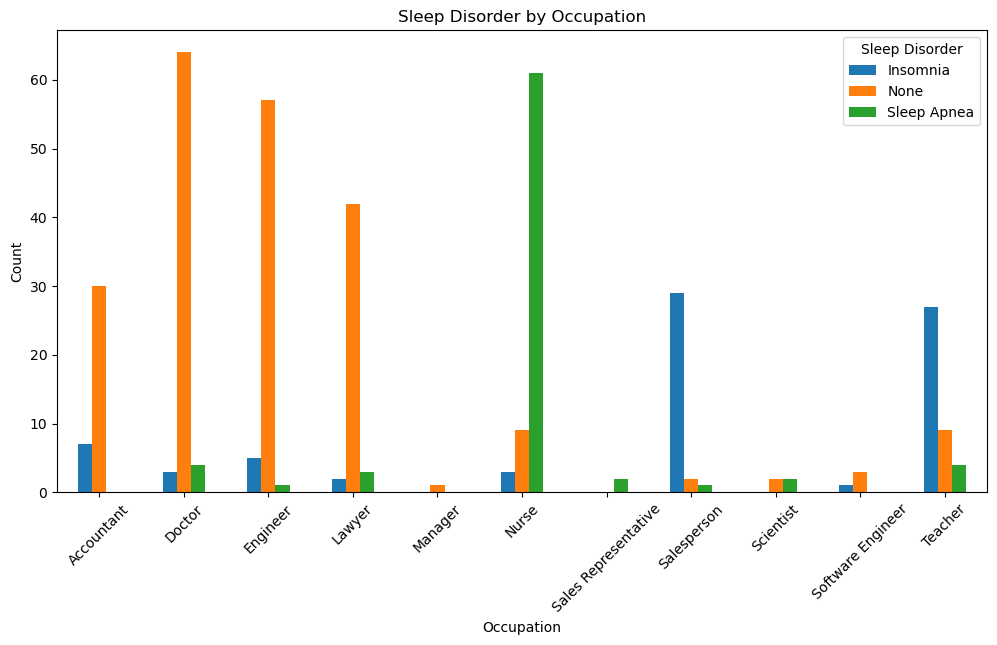

In [16]:
grouped = df.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

# Plot a bar chart
ax = grouped.plot(kind='bar', figsize=(12, 6))

# Customize the plot
plt.title('Sleep Disorder by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

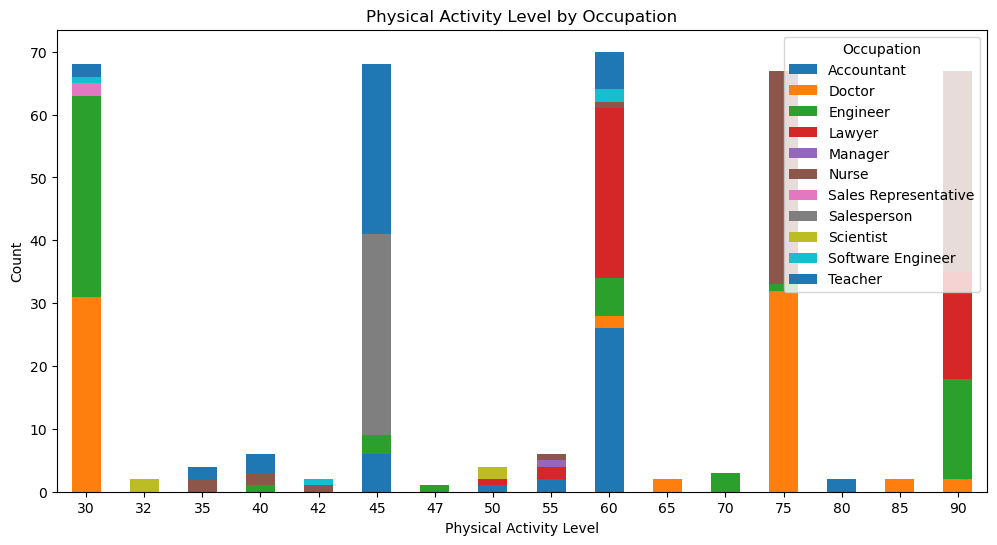

In [17]:
grouped = df.groupby(['Physical Activity Level', 'Occupation']).size().unstack(fill_value=0)
ax = grouped.plot(kind='bar', figsize=(12, 6), stacked=True)

plt.title('Physical Activity Level by Occupation')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.legend(title='Occupation', loc='upper right')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed


# Show the plot
plt.show()

After evaluating bar charts, nurses comprise a significant portion of the population, with all of them being females and exhibiting the highest rates of sleep disorders and physical activity among all professions.

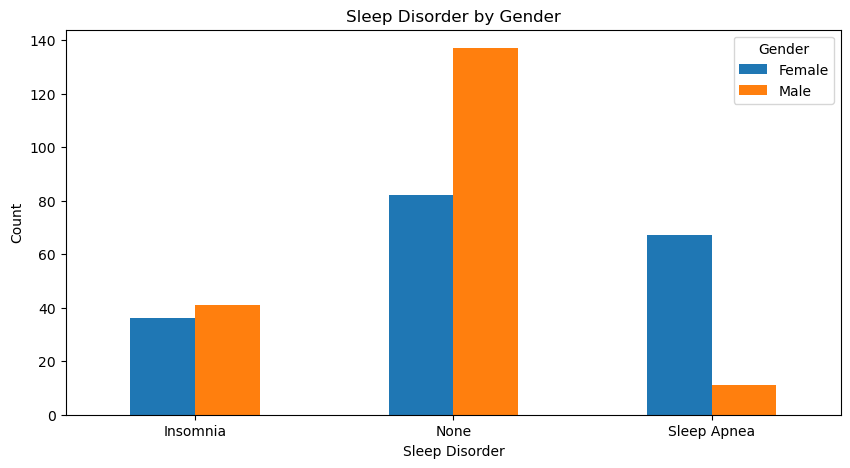

In [18]:
grouped = df.groupby(['Sleep Disorder', 'Gender']).size().unstack(fill_value=0)

# Plot a bar chart
ax = grouped.plot(kind='bar', figsize=(10, 5))

# Customize the plot
plt.title('Sleep Disorder by Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

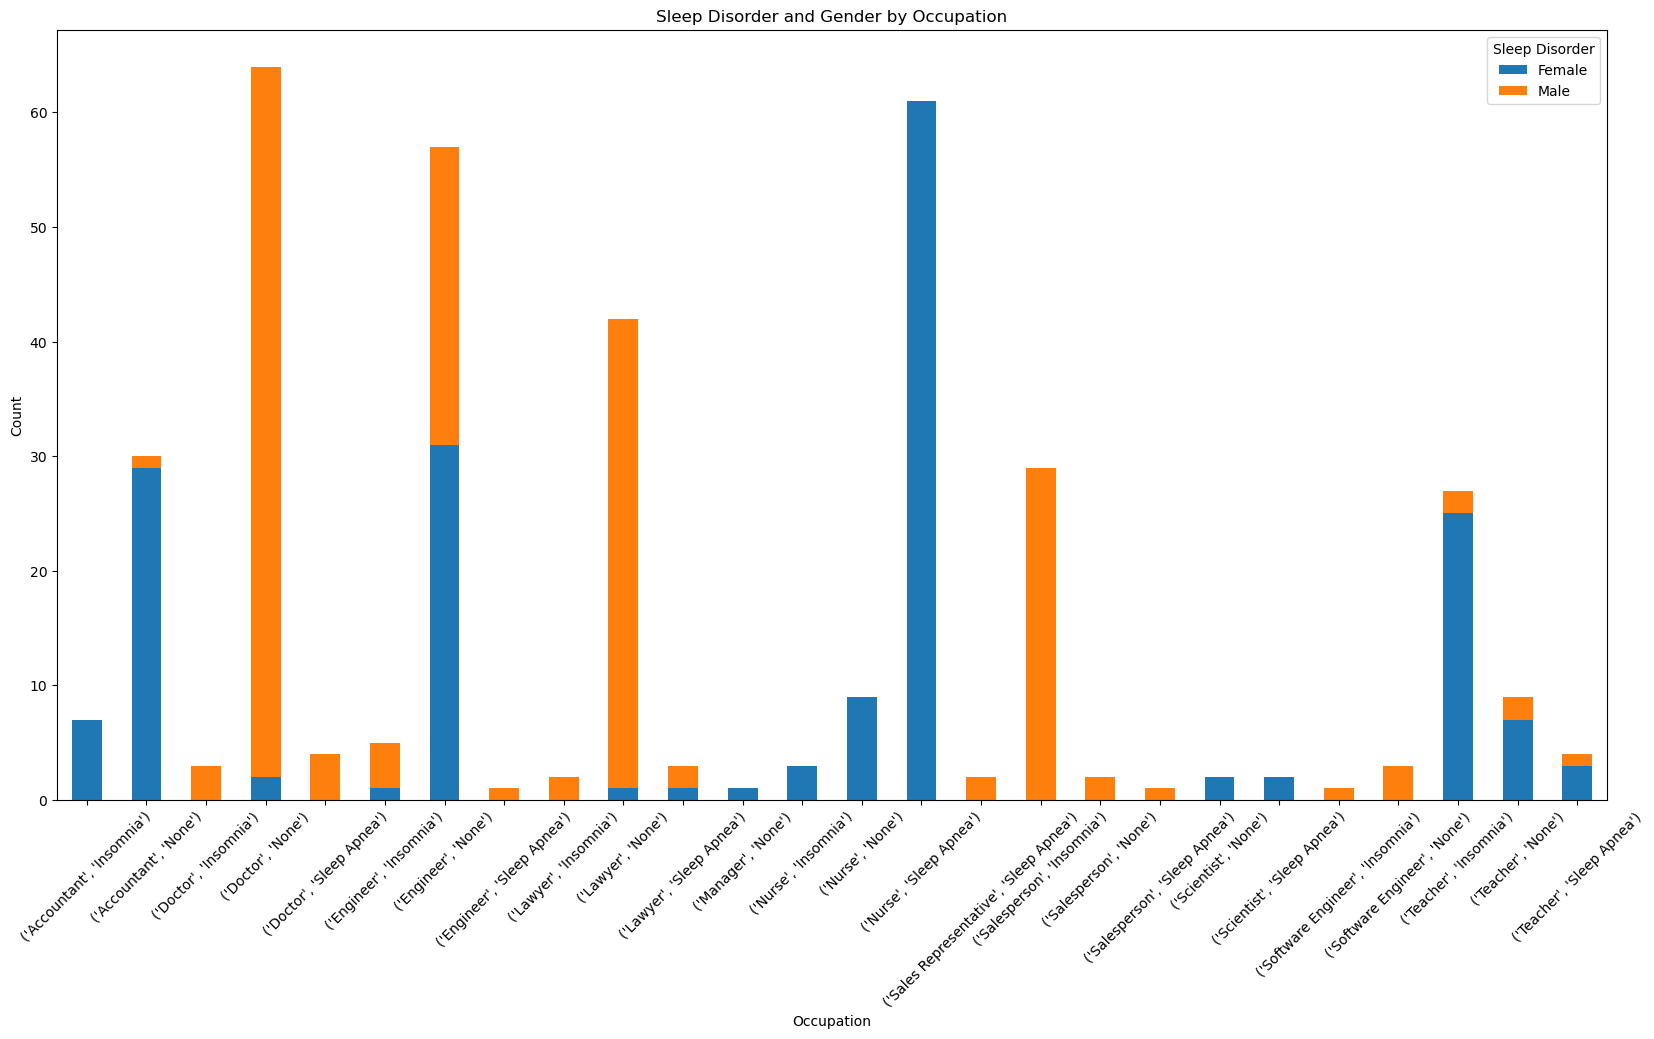

In [19]:
# Group the data by 'Occupation', 'Sleep Disorder', and 'Gender' and count the occurrences
grouped = df.groupby(['Occupation', 'Sleep Disorder', 'Gender']).size().unstack(fill_value=0)

# Create a single stacked bar chart for all occupations
fig, ax = plt.subplots(figsize=(20, 10))

grouped.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Sleep Disorder and Gender by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')
ax.legend(title='Sleep Disorder', loc='upper right')
ax.set_xticklabels(grouped.index, rotation=45)

# Show the plot
plt.show()


Most men and women do not encounter sleep disorders, but there is a gender difference. Females generally have a higher occurrence of sleep disorders, particularly Sleep Apnea, while males are more likely to experience Insomnia.

Due to the high population of nurses and their elevated prevalence of sleep disorders compared to other groups, we have demonstrated the percentage of total sleep disorders attributed to nurses.

In [20]:
sleep_disorder_related = df[df['Sleep Disorder'].str.contains('Apnea|Insomnia', case=False, na=False)]

# Calculate the total count of people with Sleep Disorder containing 'Apnea' or 'Insomnia'
total_sleep_disorder_related = len(sleep_disorder_related)

# Filter the above DataFrame to include only rows where Occupation is 'Nurse'
nurse_sleep_disorder_related = sleep_disorder_related[sleep_disorder_related['Occupation'] == 'Nurse']

# Calculate the count of nurses with Sleep Disorder containing 'Apnea' or 'Insomnia'
nurse_count = len(nurse_sleep_disorder_related)

# Calculate the percentage of nurses with Sleep Disorder containing 'Apnea' or 'Insomnia'
percentage_nurse_sleep_disorder_related = (nurse_count / total_sleep_disorder_related) * 100

print(f"Total number of people with Sleep Disorder containing 'Apnea' or 'Insomnia': {total_sleep_disorder_related}")
print(f"Number of nurses with Sleep Disorder containing 'Apnea' or 'Insomnia': {nurse_count}")
print(f"Percentage of nurses with Sleep Disorder containing 'Apnea' or 'Insomnia': {percentage_nurse_sleep_disorder_related:.2f}%")


Total number of people with Sleep Disorder containing 'Apnea' or 'Insomnia': 155
Number of nurses with Sleep Disorder containing 'Apnea' or 'Insomnia': 64
Percentage of nurses with Sleep Disorder containing 'Apnea' or 'Insomnia': 41.29%


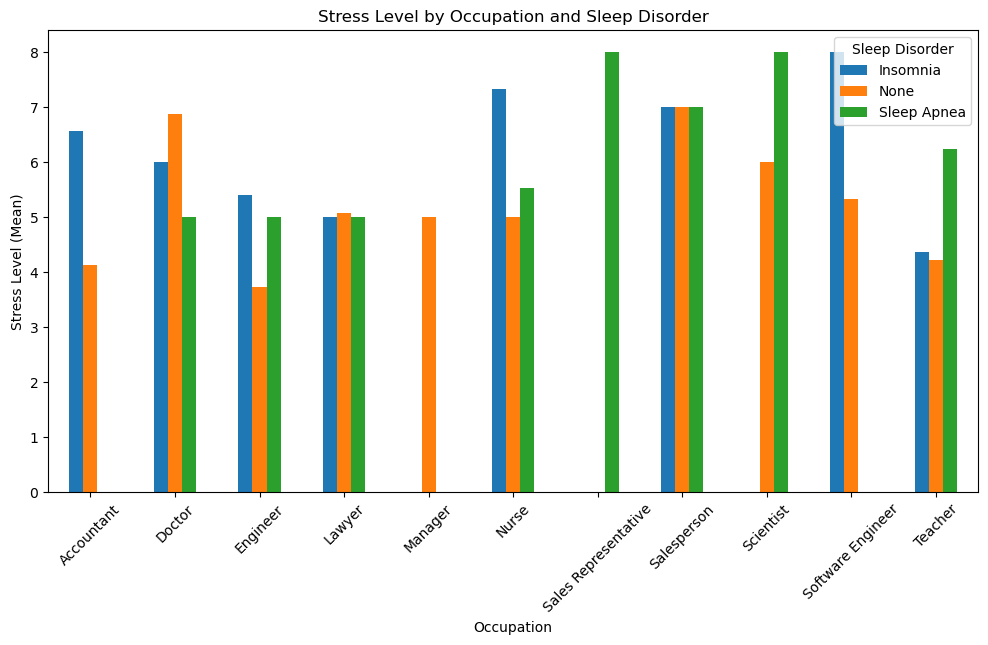

In [21]:
pivot_table = df.pivot_table(values='Stress Level', index='Occupation', columns='Sleep Disorder', aggfunc='mean')

# Create a bar chart
ax = pivot_table.plot(kind='bar', figsize=(12, 6))

# Customize the plot
plt.title('Stress Level by Occupation and Sleep Disorder')
plt.xlabel('Occupation')
plt.ylabel('Stress Level (Mean)')
plt.legend(title='Sleep Disorder', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


According to the provided information, it is evident that stress levels have a direct influence on the occurrence of sleep disorders across all groups.

## Label Encoding for categorical variables

In [22]:
label_encoder = preprocessing.LabelEncoder()

In [23]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


### Analyzing Outliers

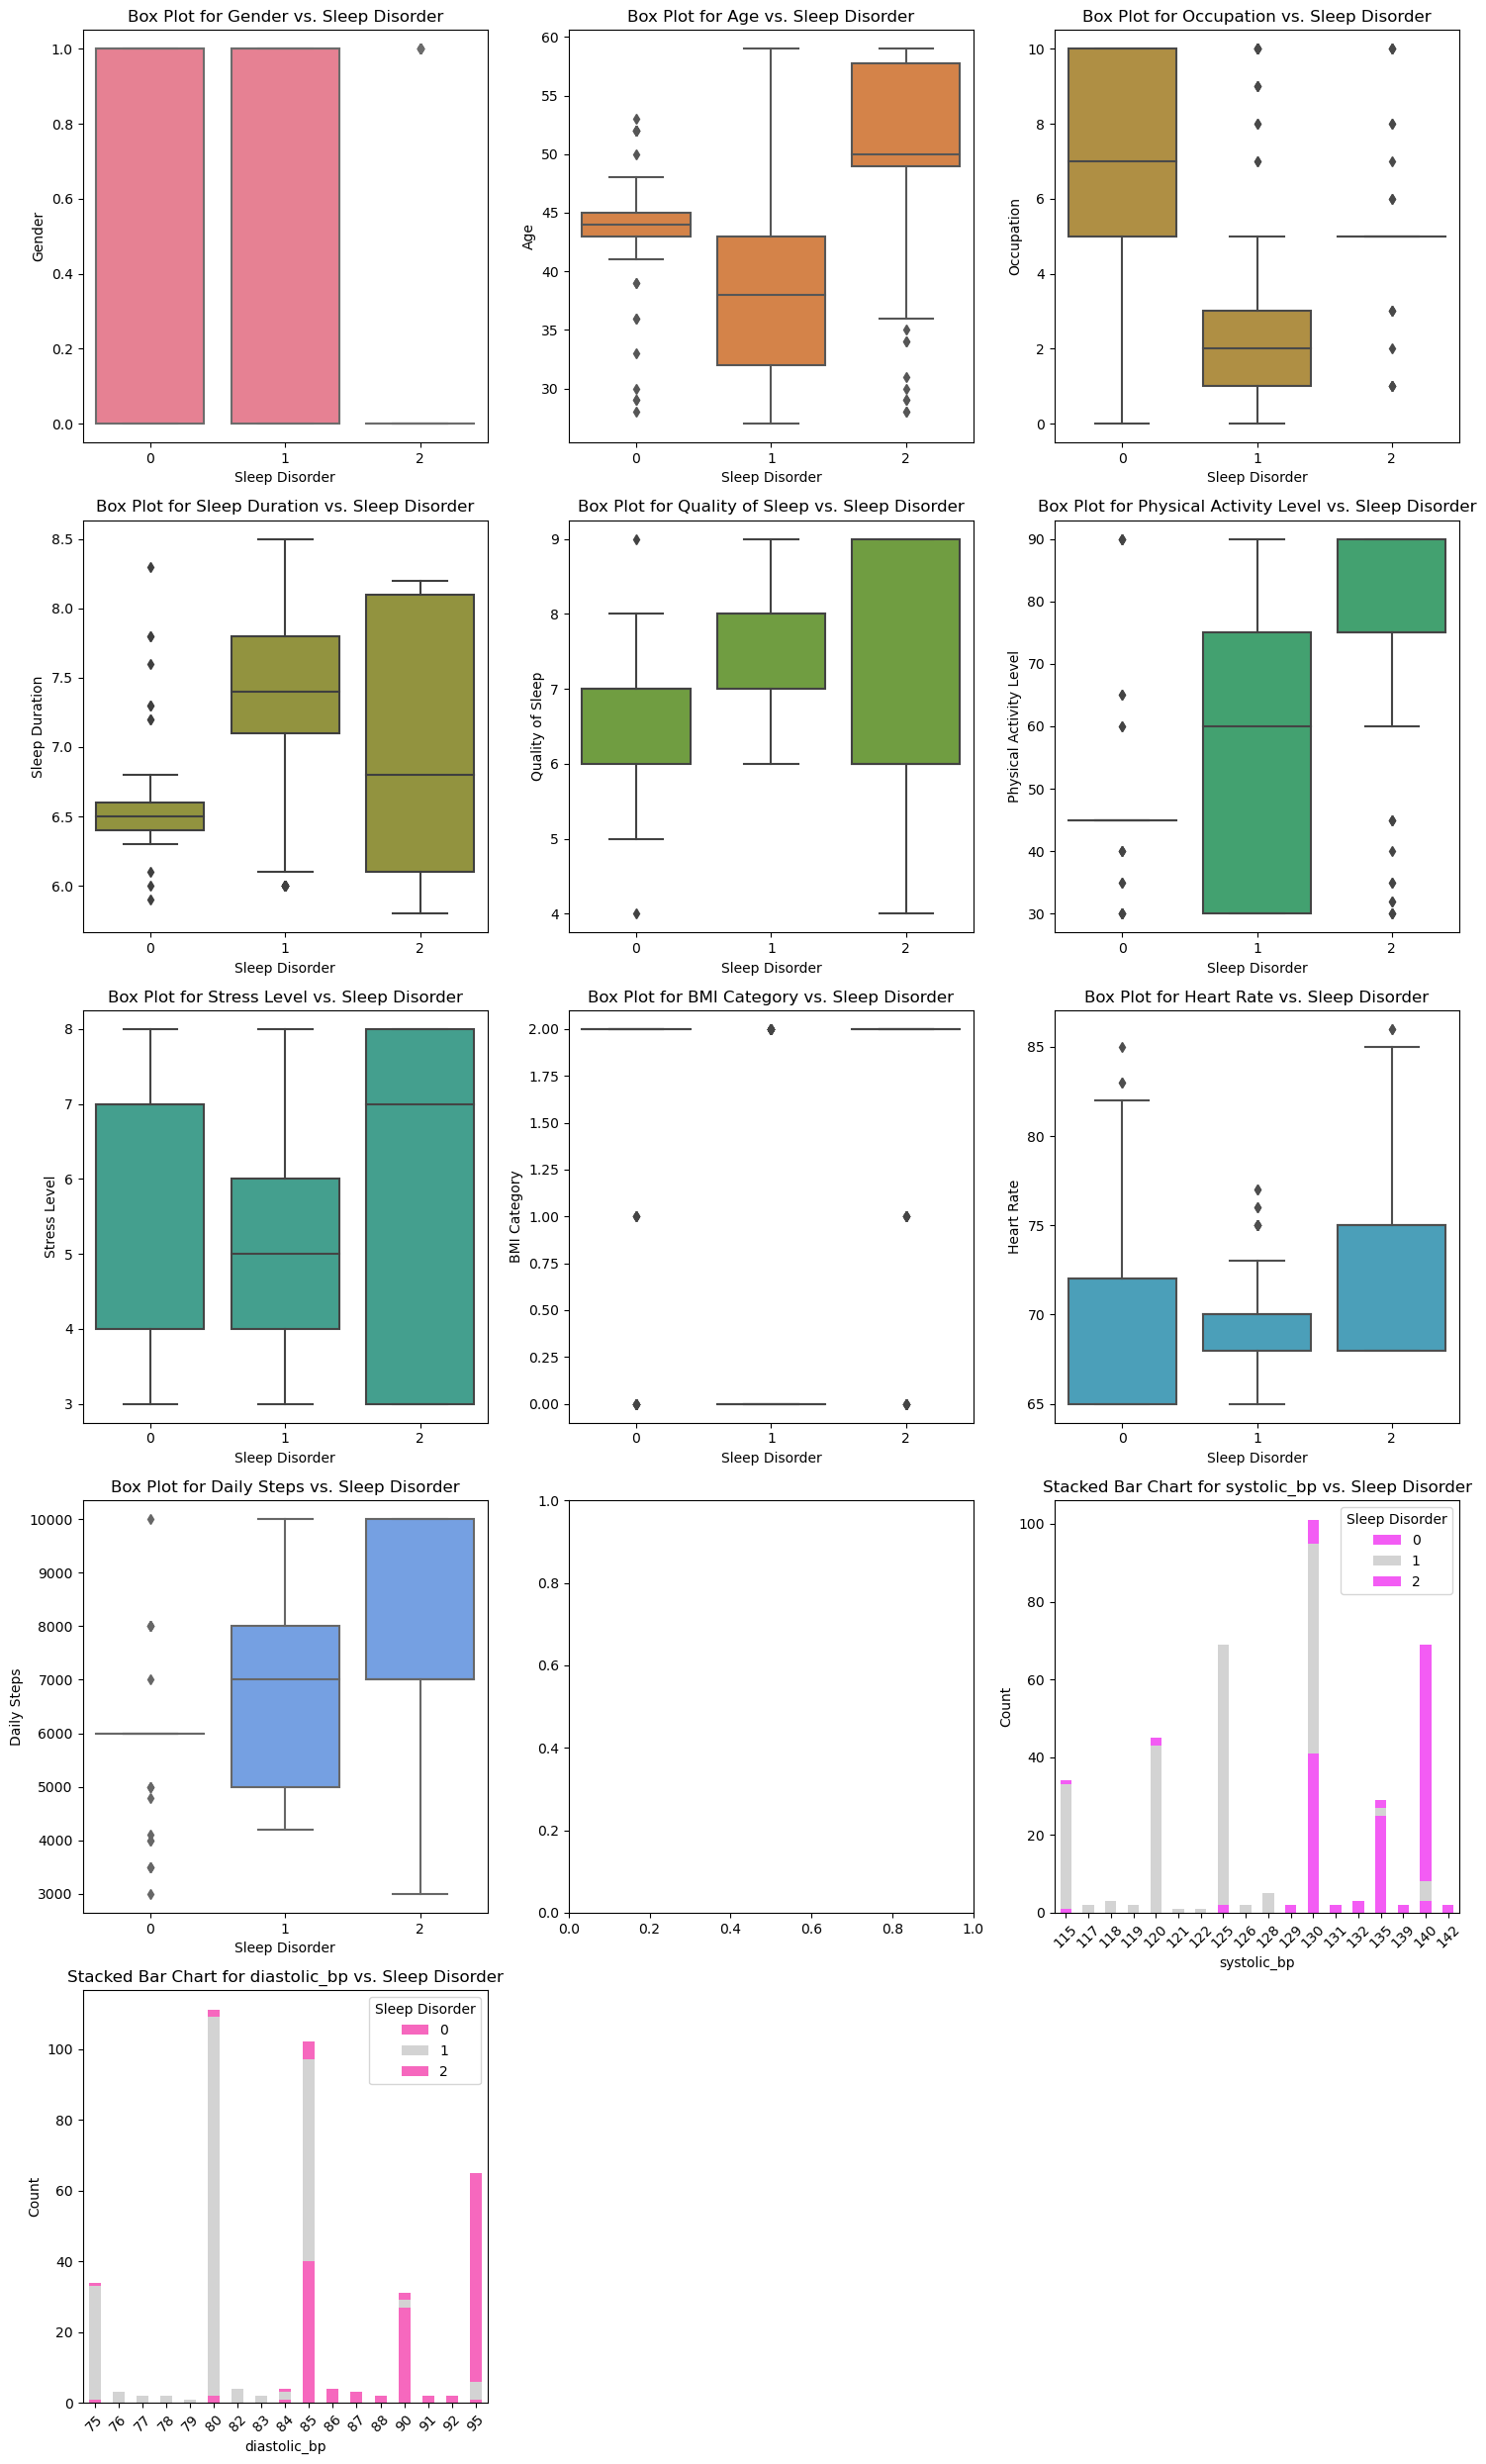

In [24]:
# Determine the number of plots per row
plots_per_row = 3
num_plots = len(df.columns)
num_rows = (num_plots - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define a mixed color palette
colors = sns.color_palette('husl', n_colors=num_plots)

# Select a reference column for comparison (e.g., "Sleep Disorder")
reference_column = "Sleep Disorder"

for i, (column, color) in enumerate(zip(df.columns, colors)):
    ax = axes[i]

    if df[column].dtype == 'object':
        if column == reference_column:
            # For the reference column, create a simple countplot
            sns.countplot(data=df, x=column, ax=ax, palette=[color])
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.set_title(f'Countplot for {column}')
            ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        else:
            # For other object columns, create a stacked bar chart with respect to the reference column
            cross_tab = pd.crosstab(df[column], df[reference_column])
            cross_tab.plot(kind='bar', stacked=True, color=[color, 'lightgray'], ax=ax)
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.set_title(f'Stacked Bar Chart for {column} vs. {reference_column}')
            ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    else:
        if column != reference_column:
            # For numeric columns, create box plots with respect to the reference column
            sns.boxplot(data=df, x=reference_column, y=column, ax=ax, palette=[color])
            ax.set_xlabel(reference_column)
            ax.set_ylabel(column)
            ax.set_title(f'Box Plot for {column} vs. {reference_column}')

# Remove any empty subplots
for i in range(num_plots, num_rows * plots_per_row):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## See outliers
Based on the information gathered from the diagrams, it appears that the columns dealing with Physical Activity Level, Heart Rate, Daily Steps, as well as Sleep Duration may be susceptible to containing outliers. Consequently, an investigation into potential outliers was conducted for these specific columns.

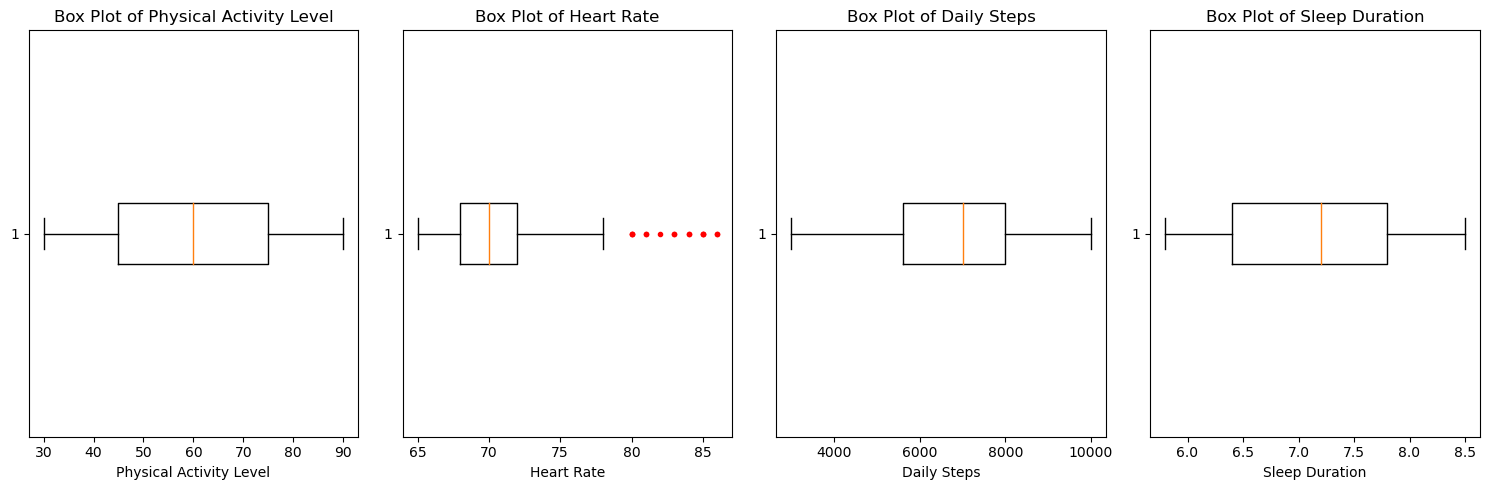

In [25]:
# Create a list of relevant columns
relevant_columns = ['Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Sleep Duration']

# Create subplots to display all box plots in one row
num_cols = len(relevant_columns)

fig, axes = plt.subplots(1, num_cols, figsize=(15, 5))

for i, column in enumerate(relevant_columns):
    ax = axes[i]
    ax.boxplot(df[column], vert=False, sym='r.')
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()


## Calculate Interquartile Range(IQR) for each relevant column

After conducting an outlier test, it was evident that the Heart Rate column contained outliers. To address this issue, the IQR (Interquartile Range) method was employed to remove these outliers from the dataset.


In [26]:
relevant_columns = ['Heart Rate']

for column in relevant_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers based on the bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

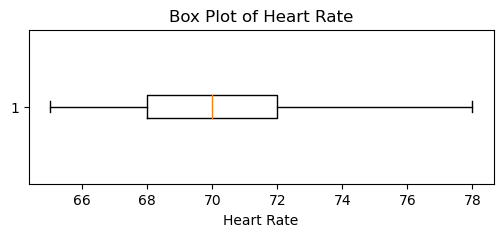

In [27]:
import matplotlib.pyplot as plt

# Specify the column for the box plot
column = 'Heart Rate'

# Create a box plot for the 'Heart Rate' column
plt.figure(figsize=(6, 2))
plt.boxplot(df[column], vert=False, sym='r.')
plt.title(f'Box Plot of {column}')
plt.xlabel(column)
plt.show()


In [28]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
7,1,29,1,7.8,7,75,6,0,70,8000,1,120,80
8,1,29,1,7.8,7,75,6,0,70,8000,1,120,80


## Normalization/Scaling

In [29]:
# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Initialize Z-score Standardization Scaler
z_score_scaler = StandardScaler()

# Apply Min-Max scaling to the entire DataFrame
df_min_max_scaled = min_max_scaler.fit_transform(df)

# Apply Z-score standardization to the entire DataFrame
df_z_score_scaled = z_score_scaler.fit_transform(df)


In [30]:
# Identify numerical columns (assuming all columns are numeric)
numerical_columns = df.select_dtypes(include=['number']).columns

# Exclude non-numeric columns (adjust as needed)
numerical_data = df[numerical_columns]

# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Initialize Z-score Standardization Scaler
z_score_scaler = StandardScaler()

# Apply Min-Max scaling to the numerical data
df_min_max_scaled = min_max_scaler.fit_transform(numerical_data)

# Apply Z-score standardization to the numerical data
df_z_score_scaled = z_score_scaler.fit_transform(numerical_data)


In [31]:
min_values = df_min_max_scaled.min()
max_values = df_min_max_scaled.max()
print("Min-Max Scaling:")
print("Minimum values:", min_values)
print("Maximum values:", max_values)

# Check Z-score Standardization
mean_values = df_z_score_scaled.mean()
std_values = df_z_score_scaled.std()
print("\nZ-score Standardization:")
print("Mean values:", mean_values)
print("Standard deviation values:", std_values)

Min-Max Scaling:
Minimum values: 0.0
Maximum values: 1.0000000000000004

Z-score Standardization:
Mean values: 2.6089819368248803e-17
Standard deviation values: 1.0


In [32]:
# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to the entire DataFrame
df_scaled = df.copy()  # Create a copy of the DataFrame
df_scaled[df.select_dtypes(include=['number']).columns] = min_max_scaler.fit_transform(df.select_dtypes(include=['number']))

# Now, df_scal

In [33]:
# Identify numerical columns (assuming all columns are numeric)
numerical_columns = df.select_dtypes(include=['number']).columns

# Exclude non-numeric columns (adjust as needed)
numerical_data = df[numerical_columns]

# Apply Min-Max scaling to each column to the range [-1, 1]
for column in numerical_data.columns:
    min_val = numerical_data[column].min()
    max_val = numerical_data[column].max()
    numerical_data[column] = 2 * ((numerical_data[column] - min_val) / (max_val - min_val)) - 1

# Now, the 'numerical_data' DataFrame contains only the numerical columns normalized to the range [-1, 1]


C:\Users\shari\AppData\Local\Temp\ipykernel_25776\4209666477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data[column] = 2 * ((numerical_data[column] - min_val) / (max_val - min_val)) - 1


In [34]:
# List of columns to normalize (include all columns if needed)
columns_to_normalize = df.columns

# Exclude non-numeric columns (adjust as needed)
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
columns_to_normalize = [col for col in columns_to_normalize if col not in non_numeric_columns]

# Apply Min-Max scaling to each column to the range [-1, 1]
for column in columns_to_normalize:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = 2 * ((df[column] - min_val) / (max_val - min_val)) - 1

# Now, all columns in the 'df' DataFrame, including the last two, are normalized to the range [-1, 1]


In [35]:
# Define the columns to normalize
columns_to_normalize = ['systolic_bp', 'diastolic_bp']

# Convert the columns to numeric types and handle missing values
for column in columns_to_normalize:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert non-numeric values to NaN

# Handle missing values (replace NaN with appropriate values, e.g., mean)
df.fillna(df.mean(), inplace=True)  # Replace NaN values with column means

# Apply Min-Max scaling to each specified column to the range [-1, 1]
for column in columns_to_normalize:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = -1 + 2 * ((df[column] - min_val) / (max_val - min_val))

# Now, the 'systolic_bp' and 'diastolic_bp' columns are normalized to the range [-1, 1],
# handling non-numeric values and missing values appropriately.


In [36]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,1.0,-1.0000,0.8,-0.846154,-0.5,-0.6,0.2,1.0,0.846154,-0.966102,0.0,-0.12,-0.2
1,1.0,-0.9375,-0.8,-0.769231,-0.5,0.0,1.0,-1.0,0.538462,1.000000,0.0,-0.20,-0.5
2,1.0,-0.9375,-0.8,-0.769231,-0.5,0.0,1.0,-1.0,0.538462,1.000000,0.0,-0.20,-0.5
7,1.0,-0.8750,-0.8,0.461538,0.0,0.5,0.2,-1.0,-0.230769,0.322034,0.0,-0.60,-0.5
8,1.0,-0.8750,-0.8,0.461538,0.0,0.5,0.2,-1.0,-0.230769,0.322034,0.0,-0.60,-0.5


### Correlation Matrix Heatmap

<Axes: >

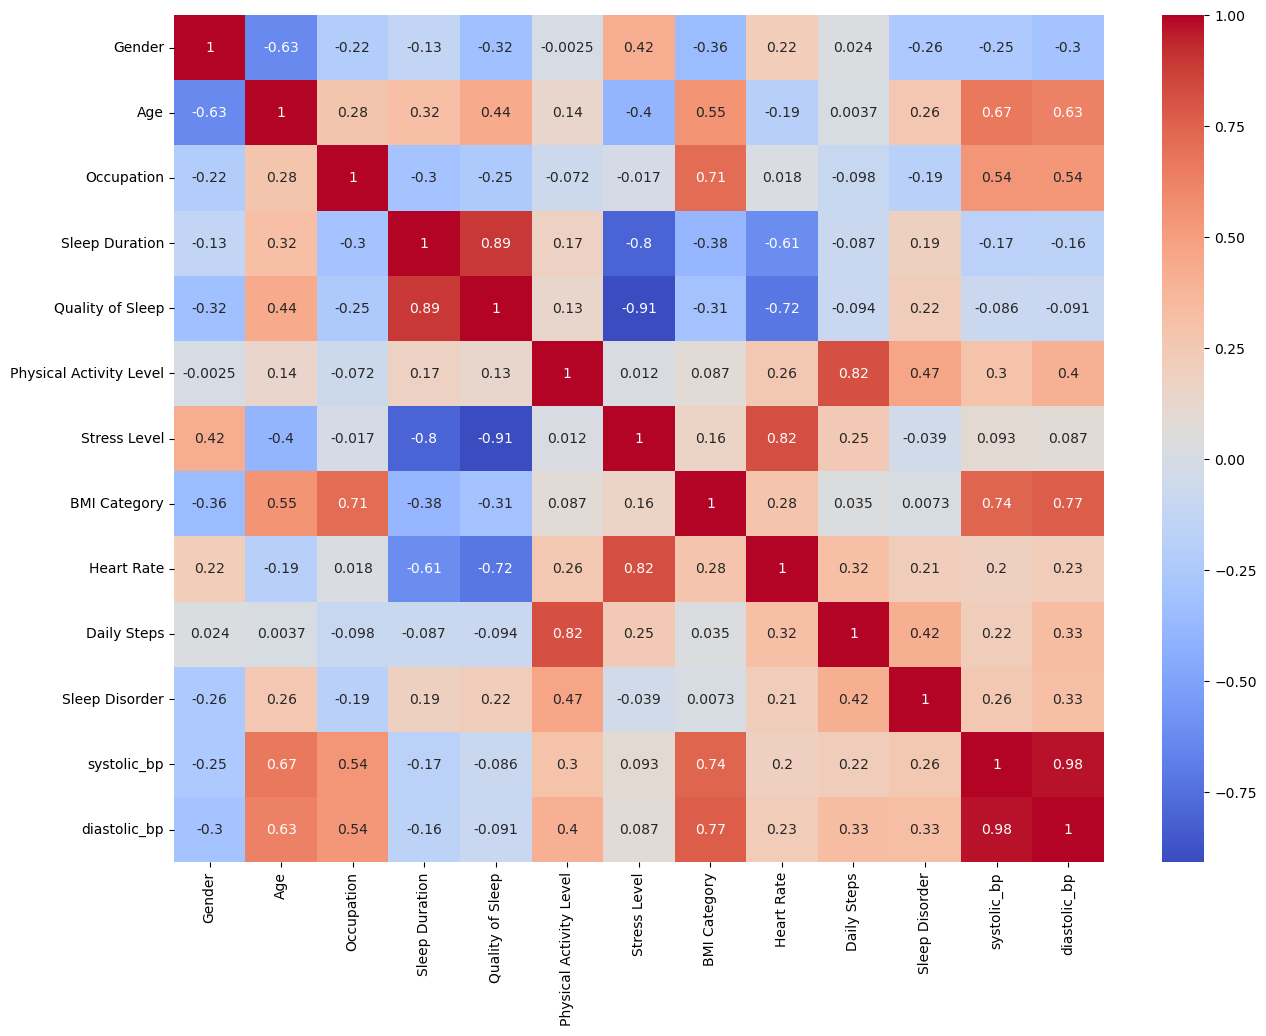

In [37]:
#Correlation Matrix Heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

## Machine Learning (ML) Modelling

To determine the optimal model, this study employed four distinct algorithms: Logistic Regression (LR), Support Vector Machine (SVM), and K Nearest Neighbors (KNN).


In [38]:
X=df.drop('Sleep Disorder',axis=1)
y=df['Sleep Disorder']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, 
                                                    random_state=101)

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
y_test

324    0.0
173    0.0
303    1.0
314    0.0
143    0.0
      ... 
241   -1.0
78     0.0
257   -1.0
113    0.0
193   -1.0
Name: Sleep Disorder, Length: 72, dtype: float64

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.93      0.93      0.93        14
         0.0       0.95      1.00      0.98        40
         1.0       1.00      0.89      0.94        18

    accuracy                           0.96        72
   macro avg       0.96      0.94      0.95        72
weighted avg       0.96      0.96      0.96        72



In [44]:
accuracy_score(y_test,predictions)

0.9583333333333334

In [45]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [46]:
lr=LogisticRegression()
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters,cv=4)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [47]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8919209702660407


In [48]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,y_test)

0.9583333333333334

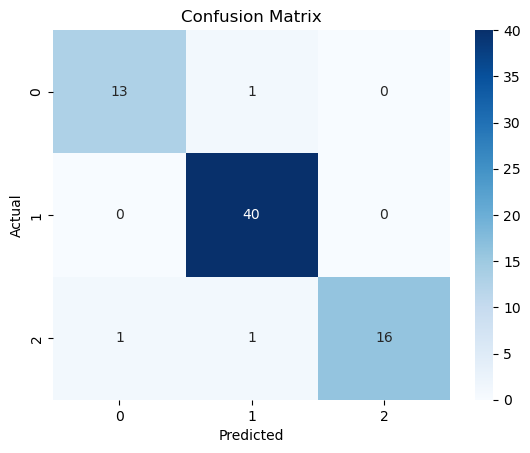

In [49]:
prediction=logreg_cv.predict(X_test)
# plot_confusion_matrix(y_test,prediction)
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
       'C': (0.5, 1, 1.5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [51]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.5, 'kernel': 'rbf'}
accuracy : 0.90935960591133


In [52]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.5, 'kernel': 'rbf'}
accuracy : 0.90935960591133


In [53]:
accu.append(svm_cv.score(X_test,y_test))
methods.append('support vector machine')
svm_cv.score(X_test,y_test)

0.9583333333333334

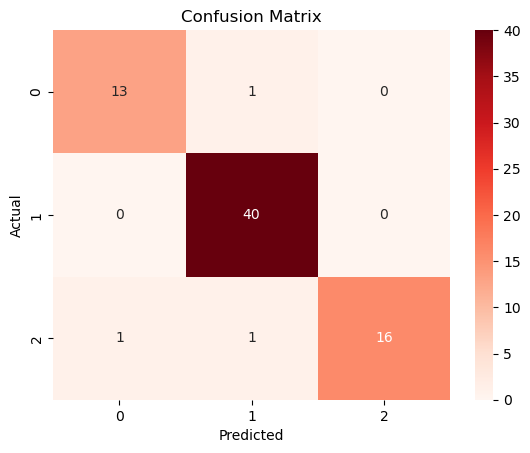

In [54]:
prediction=svm_cv.predict(X_test)
# plot_confusion_matrix(y_test,prediction)
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\shari\AppData\Local\Temp\ipykernel_25776\89004631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\shari\AppData\Local\Temp\ipykernel_25776\89004631.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

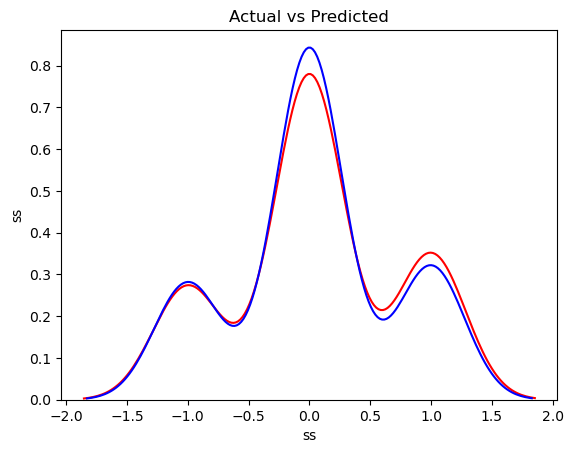

In [55]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(prediction, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted')
plt.xlabel('ss')
plt.ylabel('ss')
plt.show()

In [56]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, y_train)

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\shari\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [57]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.9128078817733991


In [58]:
accu.append(tree_cv.score(X_test,y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,y_test)

0.9583333333333334

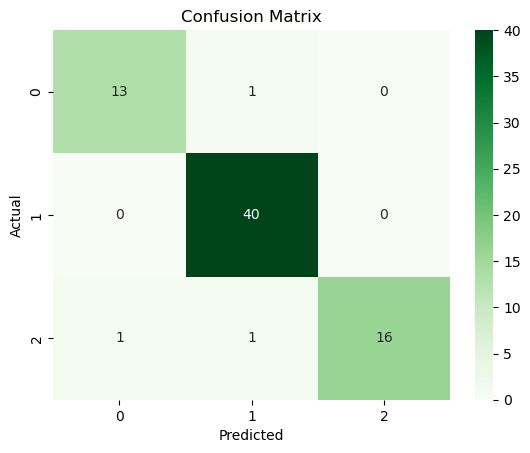

In [59]:
prediction = svm_cv.predict(X_test)
# plot_confusion_matrix(y_test,prediction)
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\shari\AppData\Local\Temp\ipykernel_25776\89004631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\shari\AppData\Local\Temp\ipykernel_25776\89004631.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

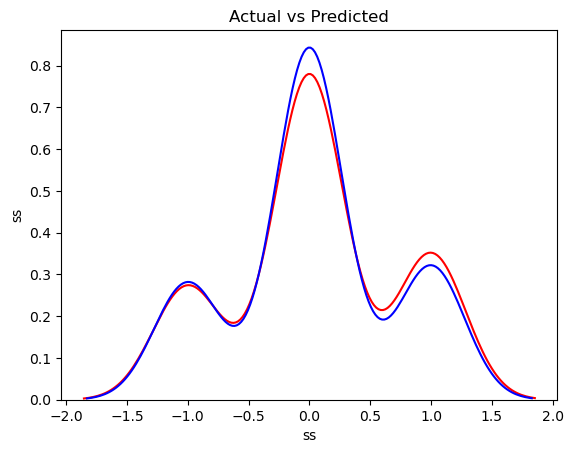

In [60]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(prediction, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted')
plt.xlabel('ss')
plt.ylabel('ss')
plt.show()

In [61]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [62]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.9023399014778324


In [63]:
accu.append(knn_cv.score(X_test,y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,y_test)

0.9583333333333334

In [64]:
prediction = knn_cv.predict(X_test)
# plot_confusion_matrix(y_test,prediction)

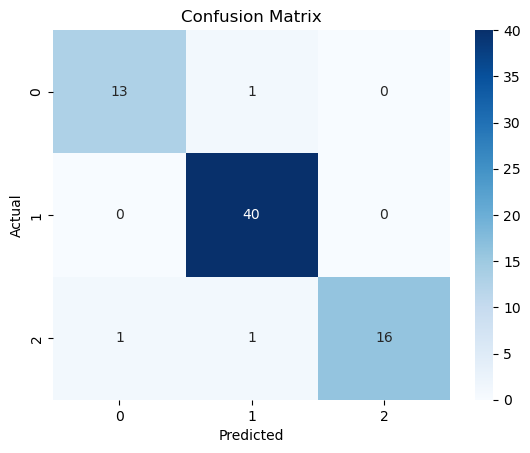

In [65]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\shari\AppData\Local\Temp\ipykernel_25776\89004631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\shari\AppData\Local\Temp\ipykernel_25776\89004631.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

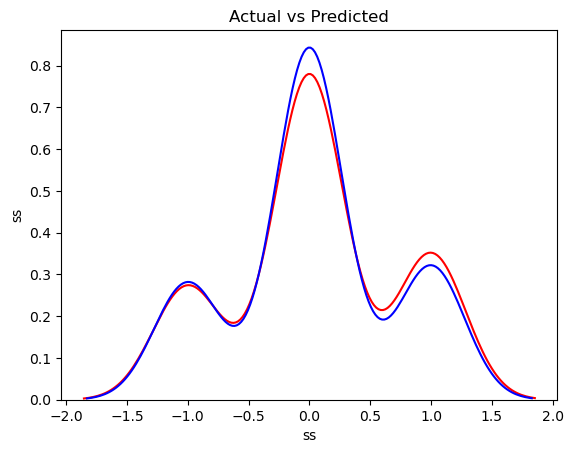

In [66]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(prediction, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted')
plt.xlabel('ss')
plt.ylabel('ss')
plt.show()

In [67]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors']
[0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334]


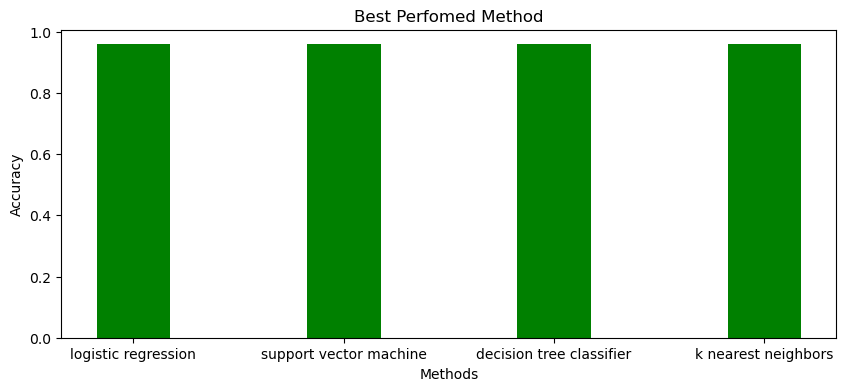

In [68]:
fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(methods, accu, color ='green',
        width = 0.35)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

## Conclusion

In this project, four distinct models were employed, namely Logistic Regression (LR), Support Vector Machine (SVM), and K Nearest Neighbors (KNN), with the objective of identifying the most effective one. 

- As illustrated in the final diagram, it is noteworthy that LR, SVM, Decision Tree Classifier and KNN all achieved a similar accuracy level of approximately 96 percent. 
-------
- To optimize these models, a grid search was conducted to identify the most suitable hyperparameters. It is worth noting that, in terms of computational efficiency, the Decision Tree Classifier was the most time-consuming, whereas LR and SVM proved to be the swiftest performers.
--------
- Based on the results obtained, it is evident that the most suitable models for this project are LR and SVM. These models have demonstrated robust performance in terms of accuracy and computational efficiency, making them the preferred choices for further analysis and application in this context.
 



##### Good Luck!!
Shahram
